In [1]:
# set path to parent file
from pathlib import Path
import os
cwd_path = Path.cwd()
set_path = str(cwd_path.parent)
os.chdir(set_path)

from Utils import running_mean, multiple_runs_with_different_seed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import importlib
import SimulatedAnealing 
importlib.reload(SimulatedAnealing)
SimulatedAnnealing = SimulatedAnealing.SimulatedAnnealing
mpl.rcParams['figure.dpi'] = 300
from rana import rana_func

# Cholesky my bru

In [2]:
Chol_config = {"pertubation_method": "Cholesky",
                     "x_length": 5,
                     "x_bounds": (-500, 500),
                     "annealing_schedule":"simple_exponential_cooling",
                     "objective_function": rana_func,
                     "maximum_archive_length": 100,
                     "archive_minimum_acceptable_dissimilarity": 0.2,
                     "maximum_markov_chain_length": 50,
                     "maximum_function_evaluations": 10000,
                     "step_size_initialisation_fraction_of_range": 0.01,
                     "bound_enforcing_method": "not_clipping",
                     "cholesky_path_length": 5,
                    }

In [3]:
np.random.seed(0)
big_chol = SimulatedAnnealing(**Chol_config)
big_chol.run()
big_chol.objective_history_array.min()

-1670.2463412765414

In [4]:
eigen_values_history, theta_history =  big_chol.eigenvalue_eigenvector_history

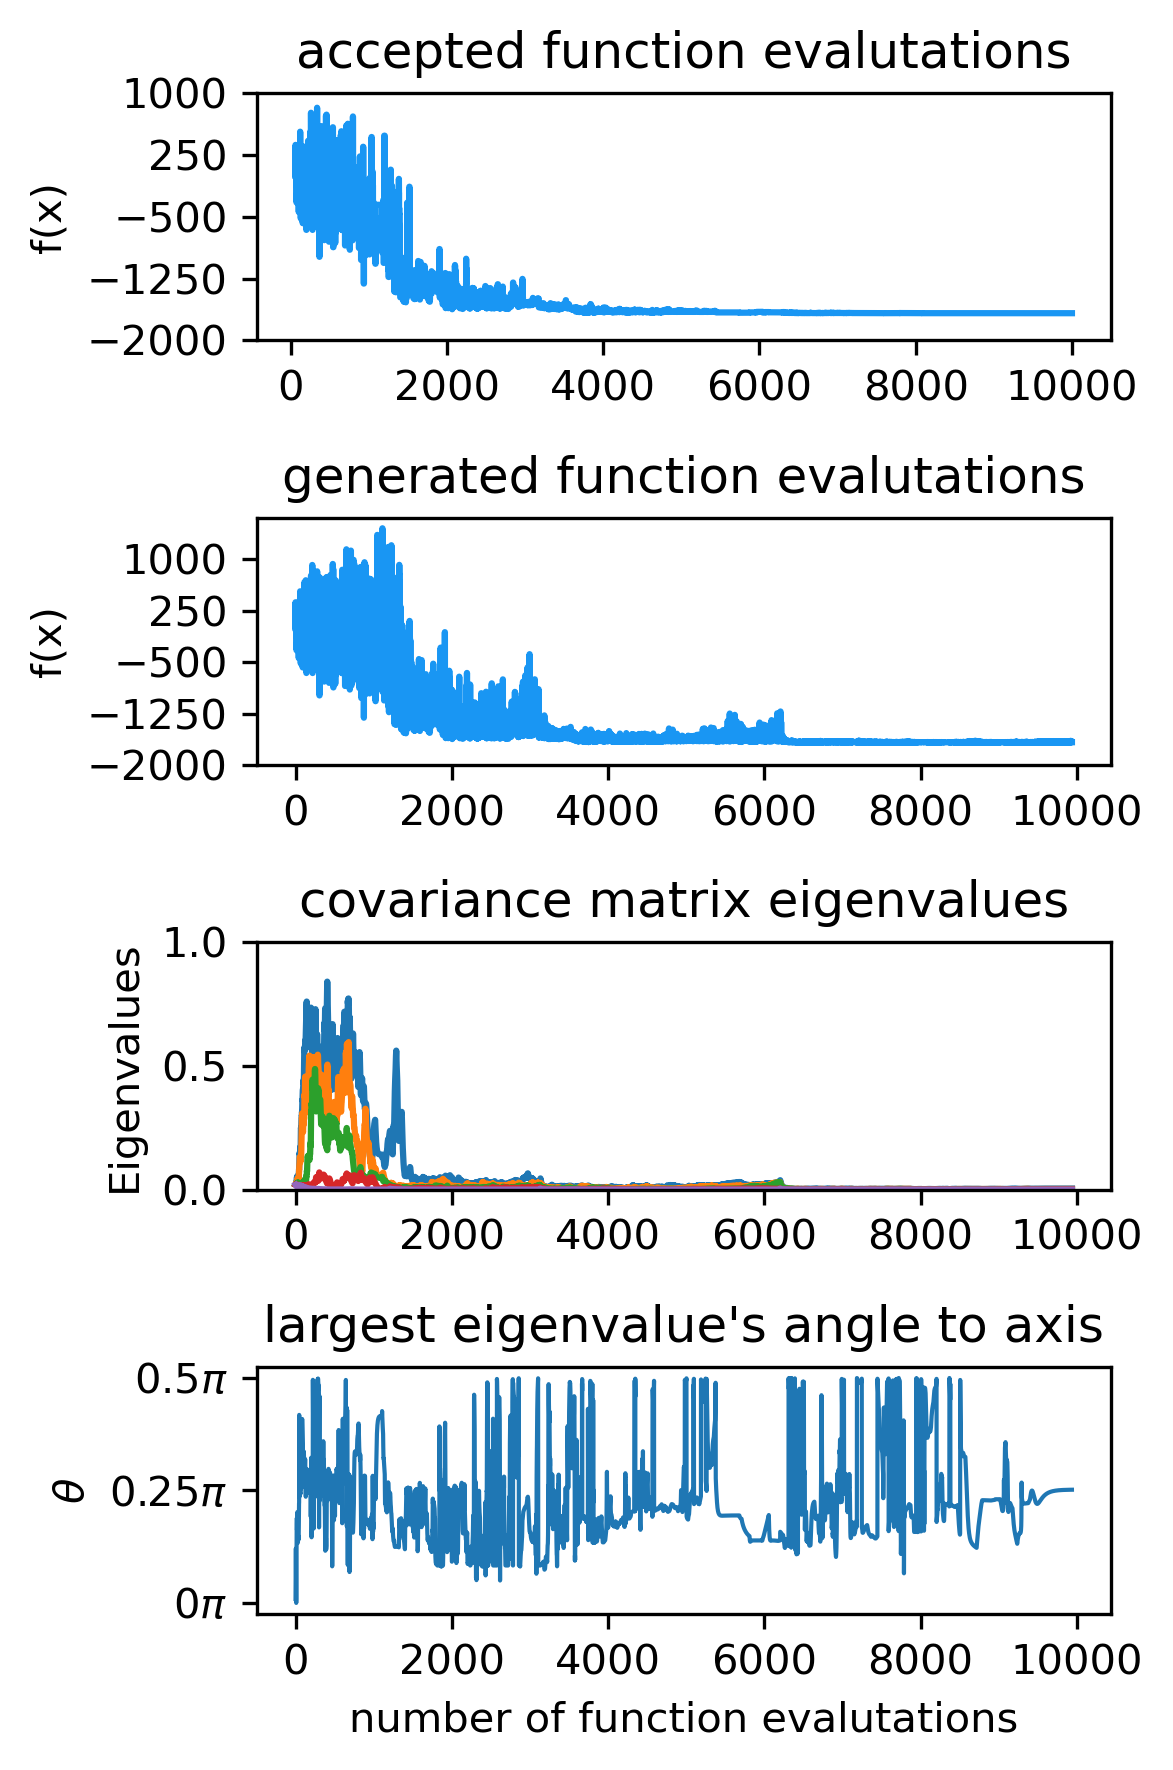

In [5]:
fig, axs = plt.subplots(4,1, figsize=(4, 6))
cols = mpl.cm.rainbow(np.linspace(0.2,0.8,5))
axs[0].step(big_chol.accepted_objective_history_array[:, 1], big_chol.accepted_objective_history_array[:, 0], color=cols[0])
axs[1].step(np.arange(len(big_chol.objective_history_array)), big_chol.objective_history_array, color=cols[0])
axs[2].plot(np.arange(eigen_values_history.shape[0]), eigen_values_history)

y =  theta_history[:, 0:1]
y_pi   = y/np.pi
unit   = 0.25
y_tick = np.arange(-0, 0.5+unit, unit)
axs[3].plot(np.arange(y.shape[0]), y, linewidth=1)
y_label = [r"$" + format(r, ".2g")+ r"\pi$" for r in y_tick]
axs[3].set_yticks(y_tick*np.pi)
axs[3].set_yticklabels(y_label)


axs[0].set_yticks(np.linspace(-2000, 1000, 5))
axs[0].set_title("accepted function evalutations")
axs[0].set_ylabel("f(x)")


axs[1].set_yticks(np.linspace(-2000, 1000, 5))
axs[1].set_title("generated function evalutations")
axs[1].set_ylabel("f(x)")

axs[2].set_ylim(0,1)
axs[2].set_ylabel("Eigenvalues")
axs[2].set_title("covariance matrix eigenvalues")
axs[3].set_ylabel(r"$\theta$")
axs[3].set_title("largest eigenvalue's angle to axis")

axs[3].set_xlabel("number of function evalutations")


fig.tight_layout()
fig.savefig("./Figures/SE5D_CHOL_final.png")

# Diag bra

In [18]:
Diag_config = {"pertubation_method": "Diagonal",
                     "x_length": 5,
                     "x_bounds": (-500, 500),
                     "annealing_schedule":"simple_exponential_cooling",
                     "objective_function": rana_func,
                     "maximum_archive_length": 100,
                     "archive_minimum_acceptable_dissimilarity": 0.2,
                     "maximum_markov_chain_length": 50,
                     "maximum_function_evaluations": 10000,
                     "step_size_initialisation_fraction_of_range": 0.1,
                     "bound_enforcing_method": "not_clipping",
                     "cholesky_path_length": 5,
                     "update_step_size_when_not_accepted_interval":10000,
                    }

In [19]:
np.random.seed(3)
diag_SE = SimulatedAnnealing(**Diag_config )
diag_SE.run()
diag_SE.objective_history_array.min()

converged


-1483.924441692363

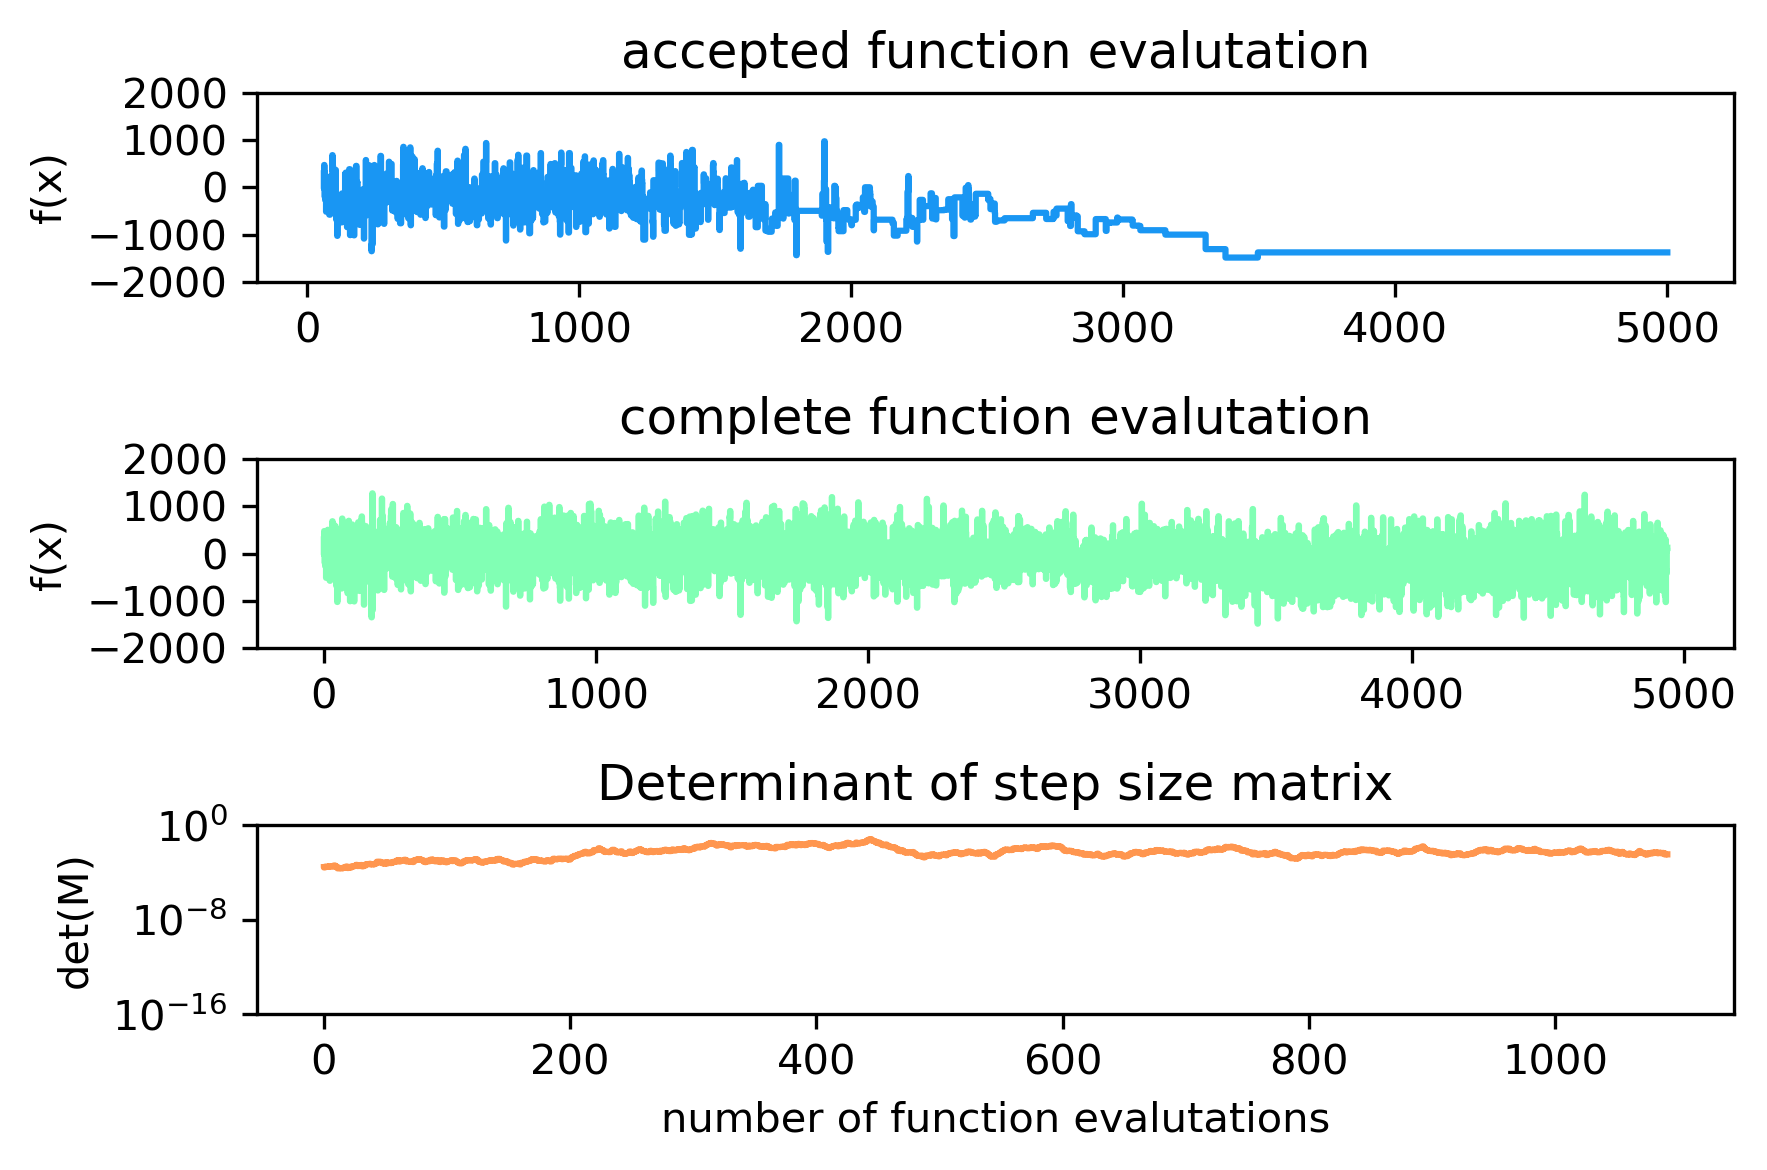

In [20]:
fig, axs = plt.subplots(3,1)
cols = mpl.cm.rainbow(np.linspace(0.2,0.8,3))
axs[0].step(diag_SE.accepted_objective_history_array[:, 1], diag_SE.accepted_objective_history_array[:, 0], color=cols[0])
axs[1].step(np.arange(len(diag_SE.objective_history_array)), diag_SE.objective_history_array, color=cols[1])
determinants = np.prod(diag_SE.step_size_matrix_history_array, axis=1)
axs[2].step(np.arange(len(determinants)),determinants, color=cols[2])

axs[0].set_yticks(np.linspace(-2000, 2000, 5))
axs[0].set_title("accepted function evalutation")
axs[0].set_ylabel("f(x)")


axs[1].set_yticks(np.linspace(-2000, 2000, 5))
axs[1].set_title("complete function evalutation")
axs[1].set_ylabel("f(x)")


axs[2].set_title("Determinant of step size matrix")
axs[2].set_ylabel("det(M)")
axs[2].set_xlabel("number of function evalutations")
axs[2].set_yscale("log")
axs[2].set_yticks([1e-16,1e-8, 1])


fig.tight_layout()

In [ ]:
"""
Diag_config = {"pertubation_method": "Diagonal",
                     "x_length": 5,
                     "x_bounds": (-500, 500),
                     "annealing_schedule":"simple_exponential_cooling",
                     "objective_function": rana_func,
                     "maximum_archive_length": 100,
                     "archive_minimum_acceptable_dissimilarity": 0.2,
                     "maximum_markov_chain_length": 50,
                     "maximum_function_evaluations": 10000,
                     "step_size_initialisation_fraction_of_range": 0.1,
                     "bound_enforcing_method": "not_clipping",
                     "cholesky_path_length": 5,
                     "update_step_size_every_step":False,
                    }
np.random.seed(0)
diag_SE = SimulatedAnnealing(**Diag_config )
diag_SE.run()
print(diag_SE.objective_history_array.min())

fig, axs = plt.subplots(3,1)
cols = mpl.cm.rainbow(np.linspace(0.2,0.8,3))
axs[0].step(diag_SE.accepted_objective_history_array[:, 1], diag_SE.accepted_objective_history_array[:, 0], color=cols[0])
axs[1].step(np.arange(len(diag_SE.objective_history_array)), diag_SE.objective_history_array, color=cols[1])
determinants = np.prod(diag_SE.step_size_matrix_history_array, axis=1)
axs[2].step(np.arange(len(determinants)),determinants, color=cols[2])

axs[0].set_yticks(np.linspace(-2000, 2000, 5))
axs[0].set_title("accepted function evalutation")
axs[0].set_ylabel("f(x)")


axs[1].set_yticks(np.linspace(-2000, 2000, 5))
axs[1].set_title("complete function evalutation")
axs[1].set_ylabel("f(x)")


axs[2].set_title("Determinant of step size matrix")
axs[2].set_ylabel("det(M)")
axs[2].set_xlabel("number of function evalutations")
axs[2].set_yscale("log")
axs[2].set_yticks([1e-6,1e-3, 1])


fig.tight_layout()
"""
None

# The simple life

In [ ]:
Simple_config = {"pertubation_method": "simple",
                     "x_length": 5,
                     "x_bounds": (-500, 500),
                     "annealing_schedule":"simple_exponential_cooling",
                     "objective_function": rana_func,
                     "maximum_archive_length": 100,
                     "archive_minimum_acceptable_dissimilarity": 0.2,
                     "maximum_markov_chain_length": 50,
                     "maximum_function_evaluations": 10000,
                     "step_size_initialisation_fraction_of_range": 0.1,
                     "bound_enforcing_method": "not_clipping",
                     "cholesky_path_length": 5,
                    }

In [ ]:
np.random.seed(0)
simple_SE = SimulatedAnnealing(**Simple_config )
x_result, objective_result = simple_SE.run()
print(objective_result)
simple_SE.objective_history_array.min()


In [ ]:
fig, axs = plt.subplots(2,1)
cols = mpl.cm.rainbow(np.linspace(0.2,0.8,3))
axs[0].step(simple_SE.accepted_objective_history_array[:, 1], simple_SE.accepted_objective_history_array[:, 0], color=cols[0])
axs[1].step(np.arange(len(simple_SE.objective_history_array)), simple_SE.objective_history_array, color=cols[1])

axs[0].set_yticks(np.linspace(-2000, 2000, 5))
axs[0].set_title("accepted function evalutation")
axs[0].set_ylabel("f(x)")


axs[1].set_yticks(np.linspace(-2000, 2000, 5))
axs[1].set_title("complete function evalutation")
axs[1].set_ylabel("f(x)")


axs[1].set_xlabel("number of function evalutations")


fig.tight_layout()